<p>Описание проекта.<p>
<p><b>Контекст: </b>
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

<p>Часть 1. Приоритизация гипотез.</p>
<p>В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.</p>
<b>Задача:</b>
<li>Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<li>Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
<li>Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.</p>

In [109]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sys

In [110]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

<p>Описание данных.</p>
<li>Hypothesis — краткое описание гипотезы;
<li>Reach — охват пользователей по 10-балльной шкале;
<li>Impact — влияние на пользователей по 10-балльной шкале;
<li>Confidence — уверенность в гипотезе по 10-балльной шкале;
<li>Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [111]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [112]:
hypothesis.Hypothesis.unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [113]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [114]:
hypothesis.sort_values(by='ICE')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000


Гипотезы 1, 3, 4, 5 имеют самый низкий приоритет. Предложенное изменение не сильно повлияет на поведение пользователей, а затраты на 1 и 3 гипотезу достаточно велики. Гипотезы 7, 8, 0 имеют высокий приоритет: предлагаемые изменения должны сильно изменить поведение пользователлей, а затраты будут средними.

In [115]:
hypothesis['RICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] * hypothesis['Reach']) / hypothesis['Efforts']

In [116]:
hypothesis.sort_values(by='RICE')

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0


Построим график для наглядного представления различия в приоритизации гипотез для разных способов.

In [117]:
hypothesis.index

RangeIndex(start=0, stop=9, step=1)

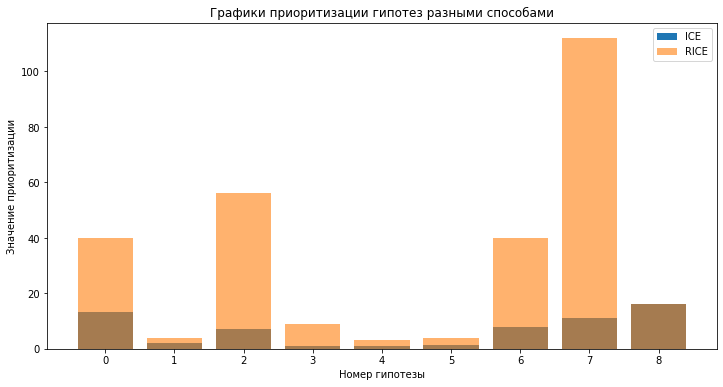

In [118]:
plt.figure(figsize=(12,6))
plt.bar(height = hypothesis['ICE'], x=hypothesis.index, label='ICE')
plt.bar(height = hypothesis['RICE'], x=hypothesis.index, label='RICE', alpha=0.6)
plt.xlabel('Номер гипотезы')
plt.ylabel('Значение приоритизации')
plt.xticks(hypothesis.index)
plt.legend()
plt.title('Графики приоритизации гипотез разными способами')
plt.show()

Рассчитывая приоритезацию гипотез методом RICE первое место заняла 7 гипотеза. Её введение охватит всю аудиторию и заставит пользователей сильно изменить своё поведение, при том, что затраты будут средними. Приоритет этой гипотезы по ICE был не максимальным, т.к. не учитывал параметр охвата (Reach), но даже без этого был выше среднего. 8 гипотеза опустилась на средние позиции т.к. её введение захватит минимальную часть пользователей, хотя и изменит это поведение очень сильно. То же можно отнести и к 0 гипотизе. 1,3,4,5 гипотезы практически не изменили свой приоритет, их введение не даст ощутимую пользу сервису и поэтому их введение можно не рассматривать. Гипотезы 2 и 6 занимают 2 и 3 место по значимости. Они привлекают небольшими затратами на введение. 2 гипотеза имеет более широкий охват аудитории, но у обеих небольшое влияние на действия пользователей.

<b>Общий вывод:</b> Гипотеза о добавлении формы подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок является самой значительной среди остальных гипотез. Она охватит всех пользователей и должна изменить их поведение в нужную сторону. Затраты на её внедрение будут средними.

<p>Часть 2. Анализ A/B-теста.</p>
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
<p><b>Задача:</b></p>
Проанализируйте A/B-тест:
<li>Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
<li>Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
<li>Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
<li>Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
<li>Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
<li>Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
<li>Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
<li>Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
<li>Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
<li>Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
<li>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
<li>Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
<li>Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
<li>Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [119]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [120]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<p>Описание данных.</p>
<li>transactionId — идентификатор заказа;
<li>visitorId — идентификатор пользователя, совершившего заказ;
<li>date — дата, когда был совершён заказ;
<li>revenue — выручка заказа;
<li>group — группа A/B-теста, в которую попал заказ.

In [121]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<p>Описание данных.</p>
<li>date — дата;
<li>group — группа A/B-теста;
<li>visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [122]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [123]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропусков в данных нет.

In [124]:
orders.duplicated().sum()

0

In [125]:
visitors.duplicated().sum()

0

Дубликатов в данных нет.

In [126]:
orders.dtypes

transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

In [127]:
visitors.dtypes

date        object
group       object
visitors     int64
dtype: object

В столбцах date обоих таблиц типы данных надо исправить на datetime.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Приведём значения столбцов date к типу datetime.

In [128]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [129]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим, есть ли пользователи, принадлежащие к обеим группам.

In [130]:
df = orders[['visitorId', 'group']]
df = df.query('visitorId.duplicated()').sort_values(by='visitorId')
df.head()

,visitorId,group
703,8300375,A
823,199603092,A
246,199603092,B
1102,199603092,A
134,199603092,A


In [131]:
df = df.groupby('visitorId').agg({'group':'nunique'}).reset_index()
df.head()

,visitorId,group
0,8300375,1
1,199603092,2
2,232979603,1
3,237748145,1
4,249864742,1


In [132]:
print('Количество пользователей, попавших в две исследуемые группы: ', len(df.query('group != 1')))
print('Доля таких пользователей из общего числа: {:.2%}'. format(15/1197))

Количество пользователей, попавших в две исследуемые группы:  15
Доля таких пользователей из общего числа: 1.25%


1.25% пользователей попали в обе исследуемые группы. Исследование можно продолжить, но необходимо сообщить об этом разработчикам.

Создадим массив уникальных пар значений дат и групп путём удаления дубликатов.

In [133]:
datesGroups = orders[['date', 'group']].drop_duplicates()

In [134]:
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Соберём агрегированные кумулятивные по дням данные о заказах в несколько действий. Получим строки таблицы orders, дата которых меньше или равна элементу из таблицы dateGroups, а группа теста была равна группе из dateGroups. Агрегируем значения и вычислим максимальную дату. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков.

In [135]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [136]:
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Аналогично получим агрегированные кумулятивные по дням данные о посетителях.

In [137]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])                                       

In [138]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одну.

In [139]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])

In [140]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [141]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим графики кумулятивной выручки по дням и группам.

Создадим таблицу для кумулятивной выручки по дням и количеством заказов для группы А, а потом В.

In [142]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

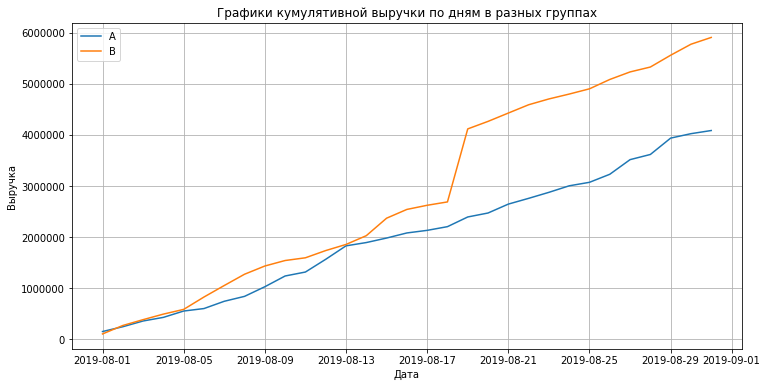

In [143]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Графики кумулятивной выручки по дням в разных группах')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

Выручка группы А растет равномерно и без скачков, тогда как в группе В в середине месяца резкий скачок. Это может свидетельствовать об увеличении числа заказов или о появлении выбросов.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.    

Построим графики кумулятивного среднего чека по группам. Для этого разделим выручку на число заказов.

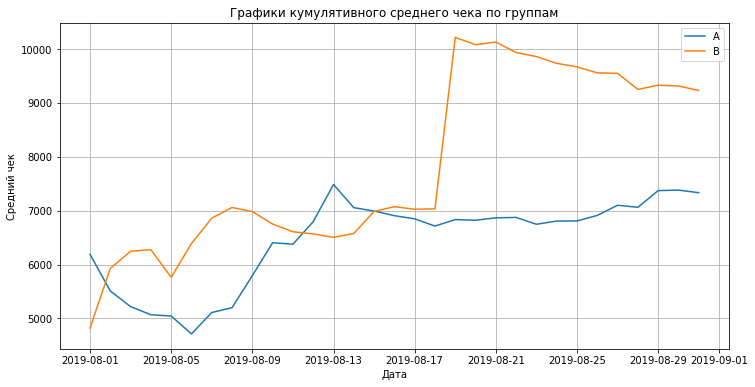

In [144]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Графики кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid(True)
plt.show()

Графики неравномерные, но во второй половине месяца стабилизируются. Пик в группе А может свидетельствовать о выбросах (например крупный заказ).

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Объединим две таблицы. Затем построим график.

In [145]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', suffixes=['A', 'B'])

In [146]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


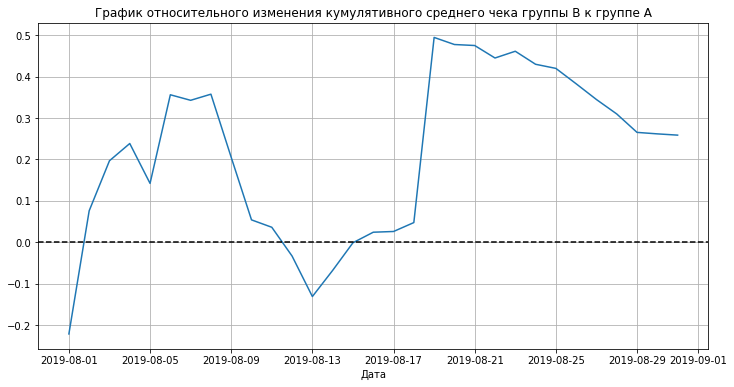

In [147]:
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('')
plt.grid(True)
plt.show()

В данных наблюдаются резкие скачки, что точно говорит о наличии выбросов.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [148]:
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

In [149]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


In [150]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

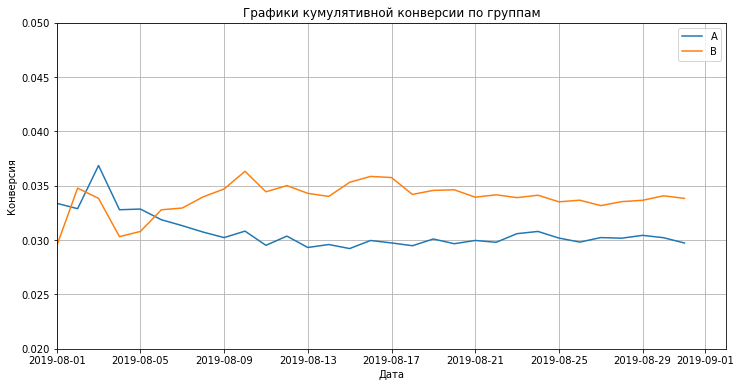

In [151]:
plt.figure(figsize=(12,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis(["2019-08-01", '2019-09-02', 0.02, 0.05])
plt.title('Графики кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.grid(True)
plt.show()

После 6 августа данные стабилизировались. Группа В стабильно лидирует.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [152]:
mergedCumulativeConversion = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], on = 'date', suffixes=['A', 'B'])

In [153]:
mergedCumulativeConversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


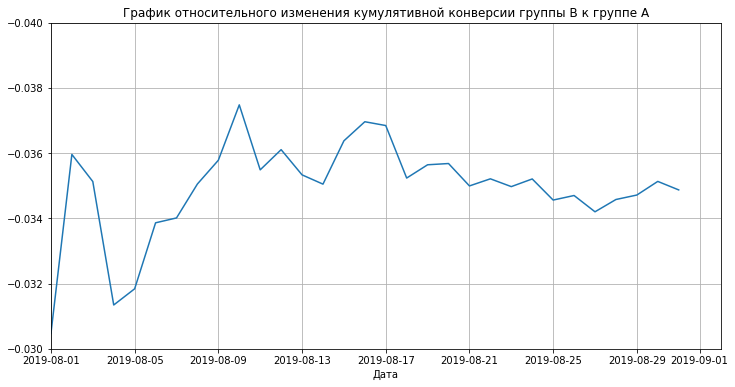

In [154]:
plt.figure(figsize=(12,6))
plt.plot(mergedCumulativeConversion['date']\
         , mergedCumulativeConversion['conversionB'] / (mergedCumulativeConversion['conversionA'] - 1))
plt.axis(["2019-08-01", '2019-09-02', -0.03, -0.04])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('')
plt.grid(True)
plt.show()

Значения конверсии продолжают колебаться. В целом, конверсия группы В меньше конверсии группы А.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.    

Выведем количество заказов по пользователям.

In [155]:
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

In [156]:
ordersByUsers.sort_values(by='transactionId', ascending = False).head()

,visitorId,transactionId
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5


Видно, что есть пользователи, совершившие больше одного заказа. Посмотрим распределение количества заказов.

In [157]:
ordersByUsers['transactionId'].value_counts()

1     937
2      64
3      17
5       6
4       3
11      2
9       1
8       1
Name: transactionId, dtype: int64

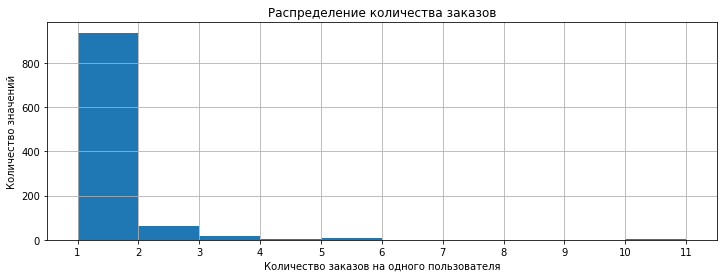

In [158]:
plt.figure(figsize=(12,4))
plt.hist(ordersByUsers['transactionId'])
plt.title('Распределение количества заказов')
plt.xticks(range(1,12))
plt.grid(True)
plt.xlabel('Количество заказов на одного пользователя')
plt.ylabel('Количество значений')
plt.show()

Большинство пользователей совершают по одному заказу. Но также немало совершивших больше одного заказа. Построим точечный график распределения числа заказов на одного пользователя. 

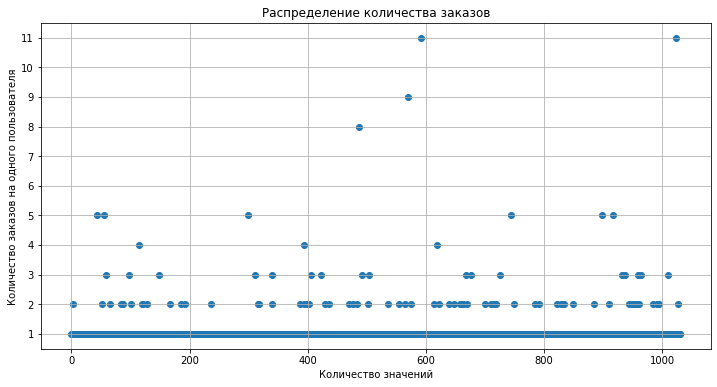

In [159]:
plt.figure(figsize=(12,6))
x = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x, ordersByUsers['transactionId'])
plt.title('Распределение количества заказов')
plt.yticks(range(1,12))
plt.xlabel('Количество значений')
plt.ylabel('Количество заказов на одного пользователя')
plt.grid(True)
plt.show()

Видно много пользователей, совершивших больше одного заказа. Возможно, именно они создают неравномерность распределения значений конверсии.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.    

In [160]:
np.percentile(ordersByUsers['transactionId'], [95, 99])

array([2., 4.])

Не более 5% пользователей совершают от 2 заказов. И всего один процент более 4х. Возьмём за нижнюю границу аномального количества заказов - 2.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

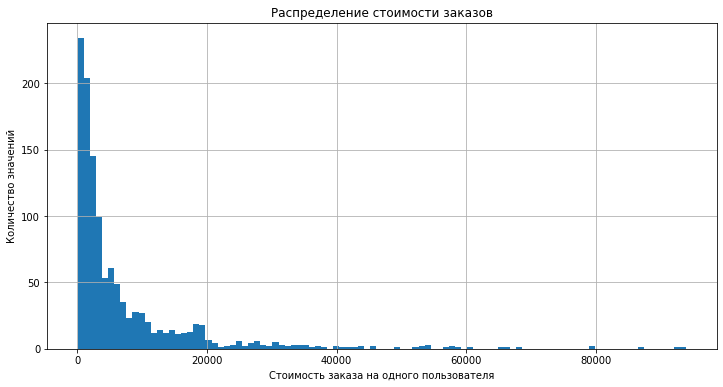

In [161]:
plt.figure(figsize=(12,6))
plt.hist(orders.query('revenue < 200000')['revenue'], bins=100)
plt.title('Распределение стоимости заказов')
plt.grid(True)
plt.xlabel('Стоимость заказа на одного пользователя')
plt.ylabel('Количество значений')
plt.show()

Подавляющее большинство стоимости заказов до 100000. Построим точечный график.

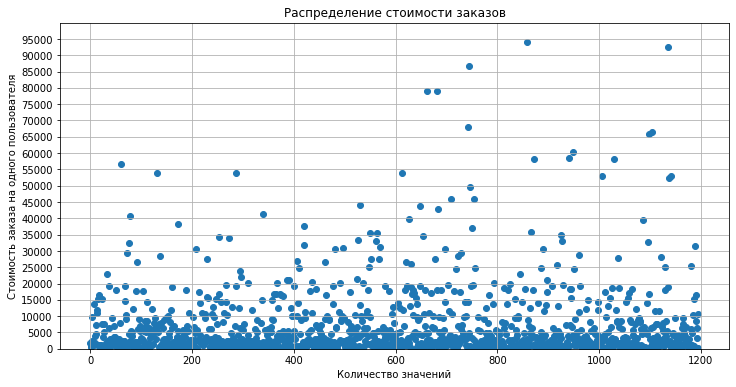

In [162]:
plt.figure(figsize=(12,6))
x = pd.Series(range(0, len(orders)))
plt.scatter(x, orders['revenue'])
plt.ylim(0,100000)
plt.title('Распределение стоимости заказов')
plt.yticks(range(0,100000, 5000))
plt.xlabel('Количество значений')
plt.ylabel('Стоимость заказа на одного пользователя')
plt.grid(True)
plt.show()

Можно взять за нижнюю границу аномальной стоимости значение в 20000. Но рекомендуется отсеивать не более 5% аномальных наблюдений. Поэтому найдём более точные границы, посмотрев на 95 и 99 перцентиль.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.    

In [163]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Выводы из анализа графика оказались почти верными. 95% пользователей совершают заказы до 28000. И всего 1% свыше 58000. Возьмём за нижнюю границу аномальных значений в стоимости заказов - 28000.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.   

Найдём количество пользователей в выбранную дату для группы А.

In [164]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Найдём количество пользователей до выбранной даты включительно для группы В.

In [165]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                                .agg({'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Аналогично для группы В.

In [166]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                                .agg({'date': 'max', 'visitorsPerDateB': 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Найдём для группы А количество заказов и суммарную выручку в выбранную дату.

In [167]:
ordersADaily = (orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Найдём для группы А количество заказов и суммарную выручку до выбранной даты включительно.

In [168]:
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']]\
                    .agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Аналогично для группы В.

In [169]:
ordersBDaily = (orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']]\
                    .agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединима данные в одну таблицу.

In [170]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в конверсии между группами. Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [171]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Объявим переменные <b>sampleA</b> и <b>sampleB</b>, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Переменная <b>sampleA</b> должна состоять из двух частей:
<li>Список с количеством заказов для каждого из пользователей: ordersByUsersA['orders'].
<li>Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])

In [172]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [173]:
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

<p>Для проведения анализа статистической значимости различия в конверсиях разных групп по "сырым" данным сформулируем нулевую и альтернативную гипотезу.</p>
<p><li>Нулевая гипотеза: Статистически значимых различий в конверсиях разных групп нет.
<li>Альтернативная гипотеза: Статистически значимые различия в конверсиях разных групп есть.
<li>Оценивать различия в выборках будет с применением критерия Манна-Уитни.
<li>Уровень значимости зададим равный 0.05.</p>

In [174]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)
alpha = 0.05
p_value = stats.mannwhitneyu(sampleA, sampleB)[1]
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в конверсиях разных групп есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсиях разных групп нет.') 
print('Вычисленный уровень значимости: ', p_value.round(3))
print('Относительный прирост конверсии группы В к группе А {0:.2%}'.format(sampleB.mean() / sampleA.mean() - 1))    

Отвергаем нулевую гипотезу: статистически значимые различия в конверсиях разных групп есть.
Вычисленный уровень значимости:  0.008
Относительный прирост конверсии группы В к группе А 13.81%


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между сегментами, передадим критерию <b>mannwhitneyu()</b> данные о выручке с заказов.
Ещё найдём относительные различия в среднем чеке между группами.

<p>Для проведения анализа статистической значимости различия в среднем чеке разных групп по "сырым" данным сформулируем нулевую и альтернативную гипотезу.</p>
<p><li>Нулевая гипотеза: Статистически значимых различий в среднем чеке разных групп нет.
<li>Альтернативная гипотеза: Статистически значимые различия в среднем чеке разных групп есть.
<li>Оценивать различия в выборках будет с применением критерия Манна-Уитни.
<li>Уровень значимости зададим равный 0.05.</p>

In [175]:
alpha = 0.05
p_value = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке разных групп есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке разных групп нет.') 
print('Вычисленный уровень значимости: ', p_value.round(3))
print('Относительная разница среднего чека группы В к группе А {0:.2%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))    

Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке разных групп нет.
Вычисленный уровень значимости:  0.365
Относительная разница среднего чека группы В к группе А 25.87%


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

Выше я определил нижнюю границу аномальных значений стоимости заказов в 28000 и в количестве заказов - 2 на одного пользователя. Сделаем срезы пользователей, совершивших больше 2 заказов или на стоимость более 28000.

In [176]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId']\
                , ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis=0)

In [177]:
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

In [178]:
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


Найдено 74 аномальных пользователя. Посмотрим как они влияли на результаты теста. Для этого уберём аномальные значения. Сделаем выборки количества заказов по пользователям в разных группах. 

In [179]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders']\
    , pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

In [180]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders']\
    , pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

<p>Для проведения анализа статистической значимости различия в конверсиях разных групп по "очищенным" данным сформулируем нулевую и альтернативную гипотезу.</p>
<p><li>Нулевая гипотеза: Статистически значимых различий в конверсиях разных групп нет.
<li>Альтернативная гипотеза: Статистически значимые различия в конверсиях разных групп есть.
<li>Оценивать различия в выборках будет с применением критерия Манна-Уитни.
<li>Уровень значимости зададим равный 0.05.</p>

In [181]:
alpha = 0.05
p_value = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в конверсиях разных групп есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в конверсиях разных групп нет.') 
print('Вычисленный уровень значимости: ', p_value.round(3))
print('Относительный прирост конверсии группы В к группе А {0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))    

Отвергаем нулевую гипотезу: статистически значимые различия в конверсиях разных групп есть.
Вычисленный уровень значимости:  0.007
Относительный прирост конверсии группы В к группе А 17.27%


P-value практически не изменился. Но результаты по конверсии немного изменились. Она выросла на 3.5% до 17.3%. Выбросы оказали не сильное влияние.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

<p>Для проведения анализа статистической значимости различия в среднем чеке разных групп по "очищенным" данным сформулируем нулевую и альтернативную гипотезу.</p>
<p><li>Нулевая гипотеза: Статистически значимых различий в среднем чеке разных групп нет.
<li>Альтернативная гипотеза: Статистически значимые различия в среднем чеке разных групп есть.
<li>Оценивать различия в выборках будет с применением критерия Манна-Уитни.
<li>Уровень значимости зададим равный 0.05.</p>

In [182]:
p_value = stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A'\
        , np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']\
        , orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

mean_check = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers))\
        ,)]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A'\
        , np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1
alpha = 0.05

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: статистически значимые различия в среднем чеке разных групп есть.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке разных групп нет.') 
print('Вычисленный уровень значимости: ', p_value.round(3))
print('Относительная разница среднего чека группы В к группе А ', mean_check.round(2))

Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке разных групп нет.
Вычисленный уровень значимости:  0.369
Относительная разница среднего чека группы В к группе А  -0.02


P-value практически не изменился. Это говорит о том, что выбросы не повлияли на статистику. А разница в среднем чеке сократилась с 26% до 2%. Видно, что выбросы оказывали сильное влияние.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<b>Выводы: </b>
<li>Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий
<li>Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
<li>График различия конверсии между группами сообщает, что результаты группы B хуже чем в группе А и ухудшаются день ото дня.

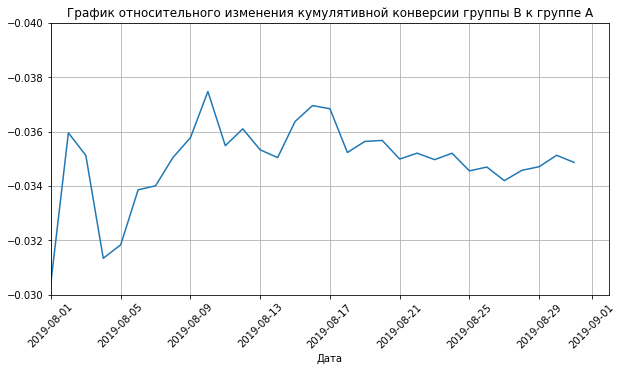

In [183]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeConversion['date']\
         , mergedCumulativeConversion['conversionB'] / (mergedCumulativeConversion['conversionA'] - 1))
plt.axis(["2019-08-01", '2019-09-02', -0.03, -0.04])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xticks(rotation = 45) 
plt.xlabel('Дата')
plt.ylabel('')
plt.grid(True)
plt.show()

<li>График различия среднего чека говорит о том, что результаты группы B хуже группы A, и есть тенденции к ухудшению;

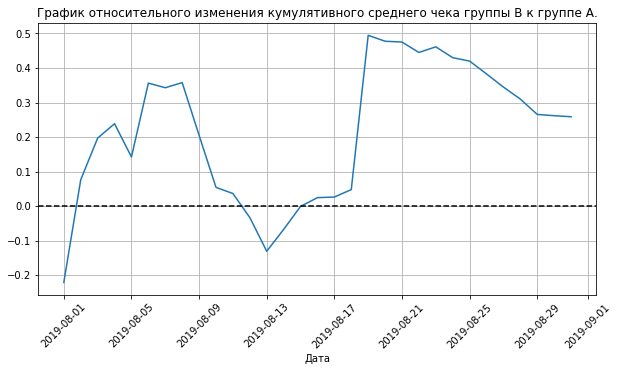

In [184]:
plt.figure(figsize=(10,5))
plt.plot(mergedCumulativeRevenue['date'],\
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A.')
plt.xticks(rotation = 45) 
plt.xlabel('Дата')
plt.ylabel('')
plt.grid(True)
plt.show()

<b>Выводы: </b> 
<p>В первой части проекта были представлены 9 гипотез по увеличению выручки интернет-магазина. Применив метод RICE для расчёта приоритизации гипотез было выявлено, что 7 гипотеза ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") является наиболее значимой. Её введение охватит всю аудиторию и заставит пользователей сильно изменить своё поведение, при том, что затраты будут средними.</p>
<p>Во второй части проекта на основании проведенного А/В теста, представленного в датасетах orders и visitors было установлено:</p>
<p>
<li>В представленных данных было обнаружено 15 пользователей (1.25% от общего числа), которые попали в обе исследуемые группы;
<li>В представленных данных было обнаружено 74 аномальных пользователя, совершивших более 2 покупок или на сумму более 28000 (эти значения были выбраны за нижнюю границу аномалии на основании анализа распределения всех значений);
<li>Нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий
<li>Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
Вычисление статистической значимости проводилось по критерию Манна-Уитни. Уровень p-value между "сырыми" и "очищенными" данными не менялся, что говорит об отсутствии влияния выбросов.
<li>Анализируя графики изменения относительных кумулятивной конверсиии и кумулятивного среднего чека видно, что конверсия группы В изначально была ниже группы А, а средний чек группы В имеет тенденцию к понижению во второй половине теста.</p>
<p><b>Общий вывод: </b></p>    
<p>Исходя из обнаруженных фактов, тест следует остановить и признать его неуспешным. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент B на самом деле лучше сегмента A — практически нулевая.</p>